In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

/Users/tahirabbas/Desktop/imp

In [3]:
BASE_DIR = '/Users/tahirabbas/Desktop/archive/UTKFace/'

In [4]:
image_paths = []
age_labels = []
gender_labels = []

for filename in tqdm(os.listdir(BASE_DIR)):
    image_path = os.path.join(BASE_DIR, filename)
    temp = filename.split('_')
    age = int(temp[0])
    gender = int(temp[1])
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)

  0%|          | 0/23708 [00:00<?, ?it/s]

In [5]:
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.head()

,image,age,gender
0,/Users/tahirabbas/Desktop/archive/UTKFace/9_1_...,9,1
1,/Users/tahirabbas/Desktop/archive/UTKFace/36_0...,36,0
2,/Users/tahirabbas/Desktop/archive/UTKFace/86_1...,86,1
3,/Users/tahirabbas/Desktop/archive/UTKFace/26_1...,26,1
4,/Users/tahirabbas/Desktop/archive/UTKFace/1_1_...,1,1


In [6]:
gender_dict = {0:'Male', 1:'Female'}

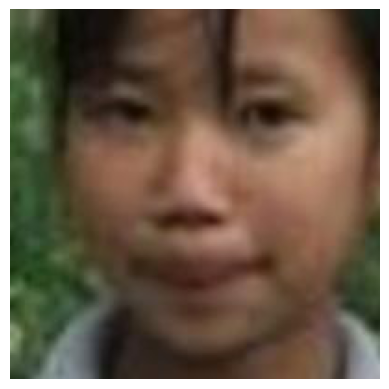

In [7]:
from PIL import Image
img = Image.open(df['image'][0])
plt.axis('off')
plt.imshow(img);

<Axes: xlabel='age', ylabel='Density'>

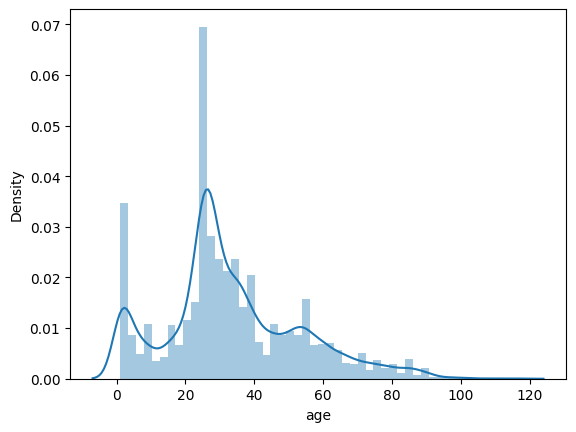

In [8]:
sns.distplot(df['age'])


In [14]:
plt.figure(figsize=(20, 20))
files = df.iloc[0:25]

for index, file, age, gender in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_dict[gender]}")
    plt.axis('off')

In [16]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale')
        img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    features = features.reshape(len(features), 128, 128, 1)
    return features


In [17]:
X = extract_features(df['image'])
X.shape

  0%|          | 0/23708 [00:00<?, ?it/s]

(23708, 128, 128, 1)

In [18]:
X = X/255.0

In [19]:
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

In [20]:
input_shape = (128, 128, 1)

In [21]:
inputs = Input((input_shape))
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)

flatten = Flatten() (maxp_4)

dense_1 = Dense(256, activation='relu') (flatten)
dense_2 = Dense(256, activation='relu') (flatten)

dropout_1 = Dropout(0.3) (dense_1)
dropout_2 = Dropout(0.3) (dense_2)

output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)
output_2 = Dense(1, activation='relu', name='age_out') (dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy', 'mae'])

In [26]:
history = model.fit(x=X, y=[y_gender, y_age], batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 128s 213ms/step - age_out_mae: 16.4741 - gender_out_accuracy: 0.5167 - loss: 17.1876 - val_age_out_mae: 12.2313 - val_gender_out_accuracy: 0.7231 - val_loss: 12.7755
Epoch 2/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 138s 232ms/step - age_out_mae: 11.5489 - gender_out_accuracy: 0.7398 - loss: 12.0774 - val_age_out_mae: 11.9658 - val_gender_out_accuracy: 0.7556 - val_loss: 12.4544
Epoch 3/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 156s 263ms/step - age_out_mae: 9.9121 - gender_out_accuracy: 0.7874 - loss: 10.3686 - val_age_out_mae: 8.5822 - val_gender_out_accuracy: 0.8176 - val_loss: 8.9717
Epoch 4/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 168s 283ms/step - age_out_mae: 8.7286 - gender_out_accuracy: 0.8170 - loss: 9.1280 - val_age_out_mae: 7.9459 - val_gender_out_accuracy: 0.8420 - val_loss: 8.2924
Epoch 5/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 131s 220ms/step - age_out_mae: 7.9181 - gender_out_accuracy: 0.8410 - loss: 8.2721 - val_age_out_mae: 7.6234 - val_gender_out_accuracy: 0.8532 

In [27]:
model.save("mera_bdia_model.h5")

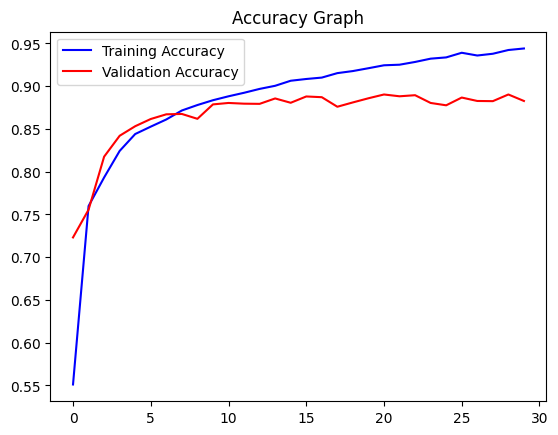

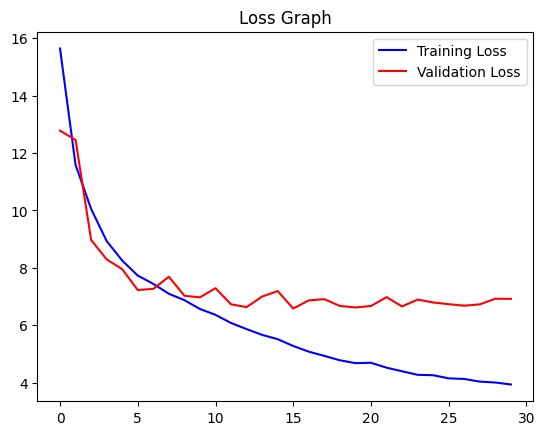

In [28]:
acc = history.history['gender_out_accuracy']
val_acc = history.history['val_gender_out_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

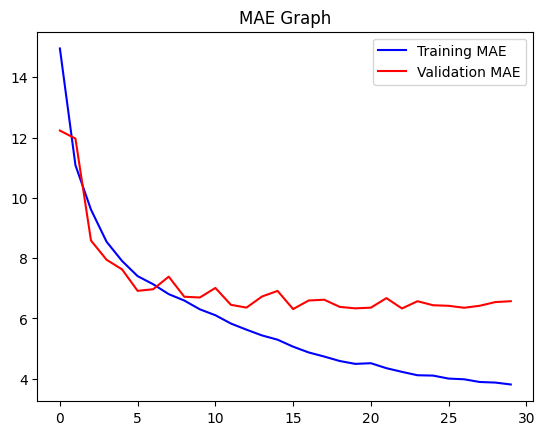

In [29]:
loss = history.history['age_out_mae']
val_loss = history.history['val_age_out_mae']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training MAE')
plt.plot(epochs, val_loss, 'r', label='Validation MAE')
plt.title('MAE Graph')
plt.legend()
plt.show()

Original Gender: Female Original Age: 32
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Predicted Gender: Female Predicted Age: 28


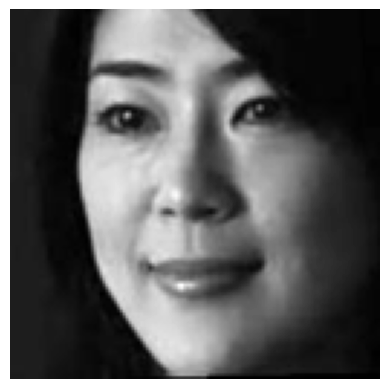

In [30]:
image_index = 100
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

Original Gender: Female Original Age: 28
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Gender: Female Predicted Age: 24


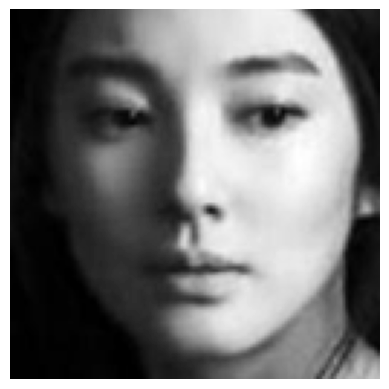

In [31]:
image_index = 3000
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

Original Gender: Female Original Age: 48
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
Predicted Gender: Female Predicted Age: 50


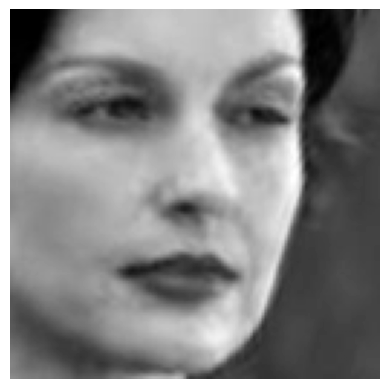

In [80]:
image_index = 10000
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

In [88]:
import cv2
import numpy as np

def preprocess_frame(frame):
    processed_frame = cv2.resize(frame, (128, 128))  
    processed_frame = cv2.cvtColor(processed_frame, cv2.COLOR_BGR2GRAY)  
    processed_frame = processed_frame.astype('float32') / 255.0  
    return processed_frame

def predict_gender_age(frame):
    processed_frame = preprocess_frame(frame)
    pred = model.predict(processed_frame.reshape(1, 128, 128, 1))
    pred_gender = gender_dict[round(pred[0][0][0])]
    pred_age = round(pred[1][0][0])
    return pred_gender, pred_age

cap = cv2.VideoCapture(0)

ret, frame = cap.read()

cap.release()

pred_gender, pred_age = predict_gender_age(frame)

print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted Gender: Male Predicted Age: 35


In [89]:
model.save('my_model.h5')


In [90]:
from keras.models import load_model

loaded_model = load_model('my_model.h5')


In [93]:
def predict_gender_age(frame, model):
    processed_frame = preprocess_frame(frame)
    pred = model.predict(processed_frame.reshape(1, 128, 128, 1))
    pred_gender = gender_dict[round(pred[0][0][0])]
    pred_age = round(pred[1][0][0])
    return pred_gender, pred_age
pred_gender, pred_age = predict_gender_age(frame, loaded_model)
print(pred_gender, pred_age)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Male 35


In [95]:
import cv2
import numpy as np
from keras.models import load_model

def preprocess_frame(frame):
    return cv2.resize(cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY), (128, 128)).astype('float32') / 255.0

def predict_gender_age(frame, model):
    pred = model.predict(frame.reshape(1, 128, 128, 1))
    return gender_dict[round(pred[0][0][0])], round(pred[1][0][0])

model = load_model('my_model.h5')

cap = cv2.VideoCapture(0)

ret, frame = cap.read()

cap.release()

pred_gender, pred_age = predict_gender_age(preprocess_frame(frame), model)

print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Predicted Gender: Male Predicted Age: 38
